# Description
- The objective of this project is to analyze drinking water and sanitation data to identify key challenges and propose actionable solutions. The datasets consists of Analysis of "Drinking water", "Sanitation" and "Hygiene" by 'Service level' aligned with SDG Goal 6 : "Clean Water and Sanitation" 
## Names of columns with their meanings
1. **Basic service** : refer to drinking water from an improved water source, provided collection time is not more than/**within** 30 minutes for a round trip, including queuing.
2. **Limited service** : Drinking water from an improved source, for which collection time **exceeds** 30 minutes for a round trip, including queuing.
3. **Open defecation** : refers to the practice of defecating in the open, such as in fields, forests, bushes, or by bodies of water, rather than using a toilet.
4. **Surface water** : Drinking water directly from a river, dam, lake, pond, stream, canal or irrigation canal.
6. **Unimproved** : Drinking water from an improved source, for which collection time exceeds 30 minutes for a round trip, including queuing.
7. **No handwashing facility** : refers to the absence of a designated place or infrastructure for individuals to wash their hands.It means there is no provision for people to clean their hands using soap and water or other sanitizing methods.
8. **Safely managed service** : mean having an improved water source (such as a pipe, borehole, or protected well) near one’s home. The water should be available throughout the day and free from faecal and priority chemical contamination.

- Categorized by following **REGIONS** :
  - Australia and New Zealand
  - Central and Southern Asia
  - Eastern and South-Eastern Asia
  - Europe and Northern America
  - Latin America and the Caribbean
  - Northern Africa and Western Asia
  - Oceania
  - Sub-Saharan Africa
- of 23 years (2000-2022)
- **Source** of Datasets used : https://washdata.org/data/household#!/table?geo0=region&geo1=sdg

# Step 1 : Importing python libraries like Numpy, Pandas, Seaborn, Sci-kit learn

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot') #using style-sheet for matplotlib and seaborn style plots
pd.set_option('display.max_columns',200) #To "Expand the number of columns" that are shown when we display a different data frame in our notebook

# Step 2 : Load the Datasets

In [212]:
df1 = pd.read_csv('Drinking water (Analysis by Service level) by SDG Regions, 23 years.csv')

# Step 3 : Exploratory Data Analysis (EDA)
EDA is a step in Data Analysis Process , in which a number of techniques are used to, better understand the dataset, being used.
## 3.1) In this step, we will perform following operations to understand schema of datasets :
1. **head()** : Displays first 5 rows of dataset ,or head(n)--> first "n" number of rows 
2. **tail()** : Displays last 5 rows of dataset, or tail(n)-->last "n" number of rows
3. **.shape** : Display "order" of dataset as (number_of_columns, number_of_rows) #it is an attribute so don't require ()
4. **.columns** : Display array of all columns present with their names 
5. **.describe()** : Give "Descriptive analysis/Statistical summary" of "numerical data" present in dataset
6. **.unique()** : returns array of unique values in given column
7. **.info()** : provides column names, their data-types, memory usage, count, Non-Null
8. **.dtypes** : provides data-type of each column

## 3.2) In this step, we will perform following operations:
### **Data Cleaning**
  1. **To find the number of DUPLICATE rows** : .duplicated().sum()
  2. **To find DUPLICATE rows** : df.loc[df.duplicated()]
  3. **Dropping the DUPLICATE rows** and reseting index :
      - using loc : df = df.loc[~df.duplicated()].reset_index(drop=True).copy()
  4. **Dropping unnecessary columns** *(which are not required for analysis)* :
      - .drop(['column_name'],axis=1) or
      - By SUBSETTING the columns
  5. **Dropping DUPLICATES in "specific columns"** using loc :
      - df.loc[df.duplicated(subset=['column_name1','column_name2'])].head(10)
  6. **Removing NULL Values** : Displaying number of null values in "every column" in dataset
     - .isna().sum()
     - .isnull().sum()
  7. **Renaming column names** :
      - df = df.rename(columns = {"old_col_name1" :"new_col_name1",
                     "old_col_name2" : "new_col_name2",
                      })
  8. **Replacing number of zero values** :
      - df['col_name']=df['col_name'].replace(0,df['col_name'].mean()/median())

# 3.1) Understanding Dataset

In [213]:
df1.head()

,Type,Region,Residence Type,Service Type,Year,Coverage,Population,Service level
0,sdg,Australia and New Zealand,total,Drinking water,2000,99.76079,2.281851e+07,At least basic
1,sdg,Australia and New Zealand,rural,Drinking water,2000,99.20040,3.508827e+06,At least basic
2,sdg,Australia and New Zealand,total,Drinking water,2001,99.75979,2.308214e+07,At least basic
3,sdg,Australia and New Zealand,rural,Drinking water,2001,99.19829,3.572236e+06,At least basic
4,sdg,Australia and New Zealand,total,Drinking water,2002,99.76071,2.336838e+07,At least basic


In [214]:
df1.tail(7)

,Type,Region,Residence Type,Service Type,Year,Coverage,Population,Service level
2627,sdg,Sub-Saharan Africa,urban,Drinking water,2020,5.22820,2.413971e+07,Unimproved
2628,sdg,Sub-Saharan Africa,total,Drinking water,2021,15.39112,1.751415e+08,Unimproved
2629,sdg,Sub-Saharan Africa,rural,Drinking water,2021,22.99280,1.513195e+08,Unimproved
2630,sdg,Sub-Saharan Africa,urban,Drinking water,2021,4.92702,2.364091e+07,Unimproved
2631,sdg,Sub-Saharan Africa,total,Drinking water,2022,14.92553,1.741461e+08,Unimproved
2632,sdg,Sub-Saharan Africa,rural,Drinking water,2022,22.44654,1.500443e+08,Unimproved
2633,sdg,Sub-Saharan Africa,urban,Drinking water,2022,4.72997,2.357014e+07,Unimproved


In [215]:
df1.sample(10) #returns random 10 rows 

,Type,Region,Residence Type,Service Type,Year,Coverage,Population,Service level
7,sdg,Australia and New Zealand,rural,Drinking water,2003,99.26952,3.611604e+06,At least basic
639,sdg,Central and Southern Asia,total,Drinking water,2006,3.68285,6.250441e+07,Limited service
1775,sdg,Europe and Northern America,urban,Drinking water,2012,0.03515,2.902704e+05,Surface water
956,sdg,Northern Africa and Western Asia,urban,Drinking water,2019,3.04420,1.009225e+07,Limited service
857,sdg,Latin America and the Caribbean,urban,Drinking water,2009,0.30184,1.380338e+06,Limited service
32,sdg,Australia and New Zealand,total,Drinking water,2016,99.97482,2.885652e+07,At least basic
2170,sdg,Central and Southern Asia,rural,Drinking water,2006,11.80057,1.368470e+08,Unimproved
1940,sdg,Northern Africa and Western Asia,urban,Drinking water,2021,0.06019,2.067767e+05,Surface water
590,sdg,Australia and New Zealand,urban,Drinking water,2012,0.00000,0.000000e+00,Limited service
1186,sdg,Central and Southern Asia,urban,Drinking water,2019,66.46423,4.931283e+08,Safely managed service


In [216]:
df1.describe()

,Year,Coverage,Population
count,2634.000000,2634.000000,2.634000e+03
mean,2011.025057,20.956720,1.234508e+08
std,6.633832,28.295861,2.548160e+08
min,2000.000000,0.000000,0.000000e+00
25%,2005.000000,1.167235,2.431691e+06
50%,2011.000000,6.533270,1.963503e+07
75%,2017.000000,31.438005,1.175108e+08
max,2022.000000,100.000000,1.840461e+09


In [217]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2634 entries, 0 to 2633
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            2634 non-null   object 
 1   Region          2634 non-null   object 
 2   Residence Type  2634 non-null   object 
 3   Service Type    2634 non-null   object 
 4   Year            2634 non-null   int64  
 5   Coverage        2634 non-null   float64
 6   Population      2634 non-null   float64
 7   Service level   2634 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 164.8+ KB


In [218]:
df1.dtypes

Type               object
Region             object
Residence Type     object
Service Type       object
Year                int64
Coverage          float64
Population        float64
Service level      object
dtype: object

In [219]:
df1.columns

Index(['Type', 'Region', 'Residence Type', 'Service Type', 'Year', 'Coverage',
       'Population', 'Service level'],
      dtype='object')

In [220]:
df1['Service level'].unique()

array(['At least basic', 'Basic service', 'Limited service',
       'Safely managed service', 'Surface water', 'Unimproved'],
      dtype=object)

In [221]:
df1['Service Type'].unique()

array(['Drinking water'], dtype=object)

In [222]:
df1.shape #Shape before dropping duplicates

(2634, 8)

# 3.2) Data Cleaning

### 3.2.1 Finding DUPLICATE number of rows 

In [223]:
df1.duplicated().sum()

np.int64(0)

### 3.2.2 Finding DUPLICATE rows

In [224]:
df1.loc[df1.duplicated()]

,Type,Region,Residence Type,Service Type,Year,Coverage,Population,Service level


In [225]:
df1 = df1.loc[~df1.duplicated()].reset_index(drop=True).copy()
df1

,Type,Region,Residence Type,Service Type,Year,Coverage,Population,Service level
0,sdg,Australia and New Zealand,total,Drinking water,2000,99.76079,2.281851e+07,At least basic
1,sdg,Australia and New Zealand,rural,Drinking water,2000,99.20040,3.508827e+06,At least basic
2,sdg,Australia and New Zealand,total,Drinking water,2001,99.75979,2.308214e+07,At least basic
3,sdg,Australia and New Zealand,rural,Drinking water,2001,99.19829,3.572236e+06,At least basic
4,sdg,Australia and New Zealand,total,Drinking water,2002,99.76071,2.336838e+07,At least basic
...,...,...,...,...,...,...,...,...
2629,sdg,Sub-Saharan Africa,rural,Drinking water,2021,22.99280,1.513195e+08,Unimproved
2630,sdg,Sub-Saharan Africa,urban,Drinking water,2021,4.92702,2.364091e+07,Unimproved
2631,sdg,Sub-Saharan Africa,total,Drinking water,2022,14.92553,1.741461e+08,Unimproved
2632,sdg,Sub-Saharan Africa,rural,Drinking water,2022,22.44654,1.500443e+08,Unimproved


We have **no duplicate rows** in our dataset, therfore no need for dropping the duplicate rows (#step 3.2.3)

### 3.2.4 Dropping unneccessary columns

In [226]:
df1.head()

,Type,Region,Residence Type,Service Type,Year,Coverage,Population,Service level
0,sdg,Australia and New Zealand,total,Drinking water,2000,99.76079,2.281851e+07,At least basic
1,sdg,Australia and New Zealand,rural,Drinking water,2000,99.20040,3.508827e+06,At least basic
2,sdg,Australia and New Zealand,total,Drinking water,2001,99.75979,2.308214e+07,At least basic
3,sdg,Australia and New Zealand,rural,Drinking water,2001,99.19829,3.572236e+06,At least basic
4,sdg,Australia and New Zealand,total,Drinking water,2002,99.76071,2.336838e+07,At least basic


In [227]:
df1.columns

Index(['Type', 'Region', 'Residence Type', 'Service Type', 'Year', 'Coverage',
       'Population', 'Service level'],
      dtype='object')

In [228]:
# By subsetting the Dataset
df1 = df1[[ #'Type', 
    'Region', 'Residence Type', 'Service Type', 'Year', 'Coverage',
       'Population', 'Service level']].copy() #commenting out not-required column name and "reassigning" dataframe
df1

,Region,Residence Type,Service Type,Year,Coverage,Population,Service level
0,Australia and New Zealand,total,Drinking water,2000,99.76079,2.281851e+07,At least basic
1,Australia and New Zealand,rural,Drinking water,2000,99.20040,3.508827e+06,At least basic
2,Australia and New Zealand,total,Drinking water,2001,99.75979,2.308214e+07,At least basic
3,Australia and New Zealand,rural,Drinking water,2001,99.19829,3.572236e+06,At least basic
4,Australia and New Zealand,total,Drinking water,2002,99.76071,2.336838e+07,At least basic
...,...,...,...,...,...,...,...
2629,Sub-Saharan Africa,rural,Drinking water,2021,22.99280,1.513195e+08,Unimproved
2630,Sub-Saharan Africa,urban,Drinking water,2021,4.92702,2.364091e+07,Unimproved
2631,Sub-Saharan Africa,total,Drinking water,2022,14.92553,1.741461e+08,Unimproved
2632,Sub-Saharan Africa,rural,Drinking water,2022,22.44654,1.500443e+08,Unimproved


### 3.2.6 Removing NULL values

In [229]:
df1.isna().sum()

Region            0
Residence Type    0
Service Type      0
Year              0
Coverage          0
Population        0
Service level     0
dtype: int64

In [230]:
df1.isnull().sum()

Region            0
Residence Type    0
Service Type      0
Year              0
Coverage          0
Population        0
Service level     0
dtype: int64

Hence, we can see, we have **no null values** in our dataset to remove

### 3.2.7 Renaming column names

In [231]:
df1.dtypes

Region             object
Residence Type     object
Service Type       object
Year                int64
Coverage          float64
Population        float64
Service level      object
dtype: object

We dont need to perform step #3.2.7 Renaming column names, because their "names" convey the true meaning of type of "values" contained in them.

### 3.2.8 Checking the number of Zero values in dataset

In [232]:
df1.columns

Index(['Region', 'Residence Type', 'Service Type', 'Year', 'Coverage',
       'Population', 'Service level'],
      dtype='object')

In [233]:
print("No of zero values in Region :",df1[df1["Region"]==0].shape[0])

No of zero values in Region : 0


In [234]:
print("No of zero values in Residence Type :",df1[df1["Residence Type"]==0].shape[0])

No of zero values in Residence Type : 0


In [235]:
print("No of zero values in Service Type :",df1[df1["Service Type"]==0].shape[0])

No of zero values in Service Type : 0


In [236]:
print("No of zero values in Year :",df1[df1["Year"]==0].shape[0])

No of zero values in Year : 0


In [237]:
print("No of zero values in Coverage :",df1[df1["Coverage"]==0].shape[0])

No of zero values in Coverage : 123


In [238]:
print("No of zero values in Population :",df1[df1["Population"]==0].shape[0])

No of zero values in Population : 123


In [239]:
print("No of zero values in Service level :",df1[df1["Service level"]==0].shape[0])

No of zero values in Service level : 0


In [240]:
#Lets check if is there any need to replace zero values of columns
df1[df1['Coverage']==0]

,Region,Residence Type,Service Type,Year,Coverage,Population,Service level
552,Australia and New Zealand,total,Drinking water,2000,0.0,0.0,Limited service
553,Australia and New Zealand,rural,Drinking water,2000,0.0,0.0,Limited service
554,Australia and New Zealand,urban,Drinking water,2000,0.0,0.0,Limited service
555,Australia and New Zealand,total,Drinking water,2001,0.0,0.0,Limited service
556,Australia and New Zealand,rural,Drinking water,2001,0.0,0.0,Limited service
...,...,...,...,...,...,...,...
2137,Australia and New Zealand,rural,Drinking water,2018,0.0,0.0,Unimproved
2140,Australia and New Zealand,rural,Drinking water,2019,0.0,0.0,Unimproved
2143,Australia and New Zealand,rural,Drinking water,2020,0.0,0.0,Unimproved
2146,Australia and New Zealand,rural,Drinking water,2021,0.0,0.0,Unimproved


Here, we can see that ,"Coverage" of "Drinking water" and "Population" is 0 for "Australia and New Zealand" mainly
- Australia is a dry continent with insufficient water and fertile soil, so coverage justifies being 0, also there is extremely low population(only reseachers, and scientists) to be considered in "Population" 
- New Zealand is a mountaineous country situated in southeast of Australia, hence it also justifies why "Coverage" and "Population" is 0 here.

#### Conclusion : We don't need to replace zero values present in "Coverage" and "Population" columns ,because it will disrupt the other parameters 

### More Refining our dataset

In [241]:
dw_total =df1[df1["Residence Type"]=="total"]
dw_total #total means "National" data(combined of all rural and urban places)

,Region,Residence Type,Service Type,Year,Coverage,Population,Service level
0,Australia and New Zealand,total,Drinking water,2000,99.76079,2.281851e+07,At least basic
2,Australia and New Zealand,total,Drinking water,2001,99.75979,2.308214e+07,At least basic
4,Australia and New Zealand,total,Drinking water,2002,99.76071,2.336838e+07,At least basic
6,Australia and New Zealand,total,Drinking water,2003,99.77938,2.366661e+07,At least basic
8,Australia and New Zealand,total,Drinking water,2004,99.79777,2.395792e+07,At least basic
...,...,...,...,...,...,...,...
2619,Sub-Saharan Africa,total,Drinking water,2018,17.10086,1.800256e+08,Unimproved
2622,Sub-Saharan Africa,total,Drinking water,2019,16.53103,1.786471e+08,Unimproved
2625,Sub-Saharan Africa,total,Drinking water,2020,15.98120,1.772729e+08,Unimproved
2628,Sub-Saharan Africa,total,Drinking water,2021,15.39112,1.751415e+08,Unimproved


In [242]:
dw_total.columns

Index(['Region', 'Residence Type', 'Service Type', 'Year', 'Coverage',
       'Population', 'Service level'],
      dtype='object')

In [243]:
#Dropping unnecessary columns in dw_total dataframe
dw_total = dw_total[['Region', #'Residence Type', 'Service Type', 
                     'Year', 'Coverage', #'Population', 
                     'Service level']].copy()
dw_total.head()

,Region,Year,Coverage,Service level
0,Australia and New Zealand,2000,99.76079,At least basic
2,Australia and New Zealand,2001,99.75979,At least basic
4,Australia and New Zealand,2002,99.76071,At least basic
6,Australia and New Zealand,2003,99.77938,At least basic
8,Australia and New Zealand,2004,99.79777,At least basic


In [244]:
#Creating pivot table named "dw_ServiceLevel" from existing "dw_total", redefining columns according to "Service level", and resetting index
dw_ServiceLevel = pd.pivot_table(dw_total, values = 'Coverage', index=['Region','Year'], columns = 'Service level').reset_index()
dw_ServiceLevel.head()

Service level,Region,Year,At least basic,Basic service,Limited service,Safely managed service,Surface water,Unimproved
0,Australia and New Zealand,2000,99.76079,NaN,0.0,NaN,0.03932,0.19989
1,Australia and New Zealand,2001,99.75979,NaN,0.0,NaN,0.03968,0.20053
2,Australia and New Zealand,2002,99.76071,NaN,0.0,NaN,0.03936,0.19994
3,Australia and New Zealand,2003,99.77938,NaN,0.0,NaN,0.03901,0.18161
4,Australia and New Zealand,2004,99.79777,NaN,0.0,NaN,0.03869,0.16355


In [245]:
#Dropping "At least basic" column and reassigning values of it to "Basic service" column at the place of "null values"
dw_ServiceLevel.loc[dw_ServiceLevel['Basic service'].isnull(), 'Basic service'] = dw_ServiceLevel['At least basic']
dw_ServiceLevel = dw_ServiceLevel.drop(['At least basic'], axis = 1)
dw_Final  = dw_ServiceLevel
dw_Final.head()

Service level,Region,Year,Basic service,Limited service,Safely managed service,Surface water,Unimproved
0,Australia and New Zealand,2000,99.76079,0.0,NaN,0.03932,0.19989
1,Australia and New Zealand,2001,99.75979,0.0,NaN,0.03968,0.20053
2,Australia and New Zealand,2002,99.76071,0.0,NaN,0.03936,0.19994
3,Australia and New Zealand,2003,99.77938,0.0,NaN,0.03901,0.18161
4,Australia and New Zealand,2004,99.79777,0.0,NaN,0.03869,0.16355


In [246]:
dw_Final['Region'].unique()

array(['Australia and New Zealand', 'Central and Southern Asia',
       'Eastern and South-Eastern Asia', 'Europe and Northern America',
       'Latin America and the Caribbean',
       'Northern Africa and Western Asia', 'Oceania',
       'Sub-Saharan Africa'], dtype=object)

In [247]:
dw_Final_aus = dw_Final[dw_Final['Region'] == 'Australia and New Zealand']
dw_Final_csa = dw_Final[dw_Final['Region'] == 'Central and Southern Asia']
dw_Final_lac = dw_Final[dw_Final['Region'] == 'Latin America and the Caribbean']
dw_Final_nawa = dw_Final[dw_Final['Region'] == 'Northern Africa and Western Asia']
dw_Final_oce = dw_Final[dw_Final['Region'] == 'Oceania']
dw_Final_ssa = dw_Final[dw_Final['Region'] == 'Sub-Saharan Africa']

In [248]:
dw_Final_aus

Service level,Region,Year,Basic service,Limited service,Safely managed service,Surface water,Unimproved
0,Australia and New Zealand,2000,99.76079,0.0,NaN,0.03932,0.19989
1,Australia and New Zealand,2001,99.75979,0.0,NaN,0.03968,0.20053
2,Australia and New Zealand,2002,99.76071,0.0,NaN,0.03936,0.19994
3,Australia and New Zealand,2003,99.77938,0.0,NaN,0.03901,0.18161
4,Australia and New Zealand,2004,99.79777,0.0,NaN,0.03869,0.16355
5,Australia and New Zealand,2005,99.81587,0.0,NaN,0.03839,0.14574
6,Australia and New Zealand,2006,99.83373,0.0,NaN,0.03812,0.12815
7,Australia and New Zealand,2007,99.85137,0.0,NaN,0.03786,0.11076
8,Australia and New Zealand,2008,99.86885,0.0,NaN,0.03763,0.09352
9,Australia and New Zealand,2009,99.88627,0.0,NaN,0.03738,0.07635


# Step 4 : Data Visualization

### 4.1) Progress on "Surface water", "Basic surface","Limited service","Unimproved","Safely managed service" over the years (2000-2022) by regions

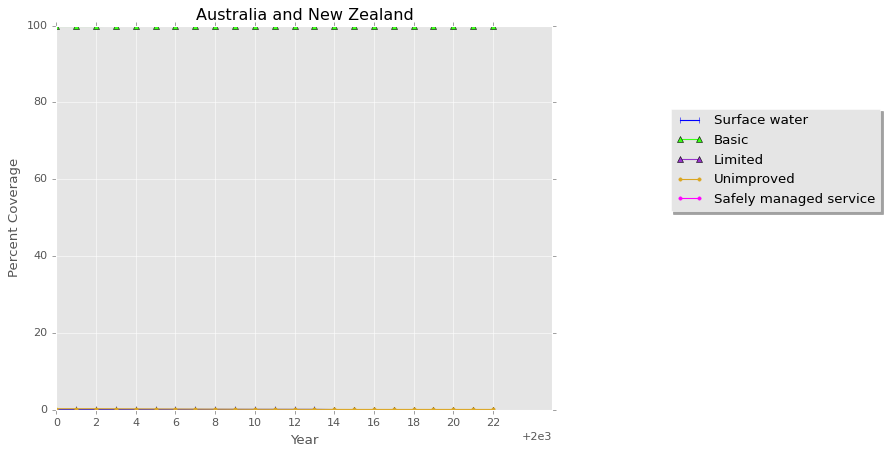

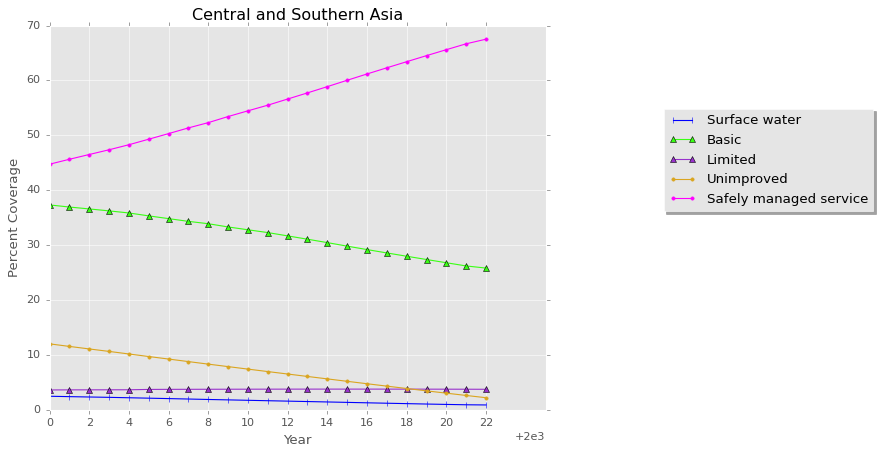

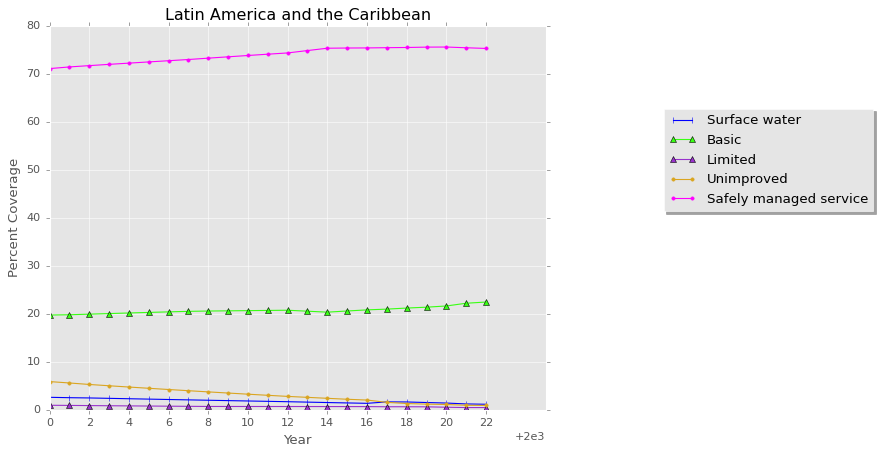

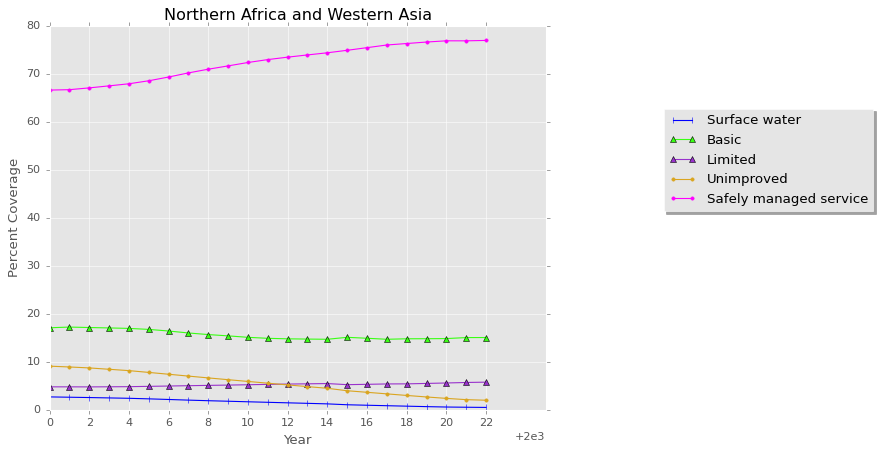

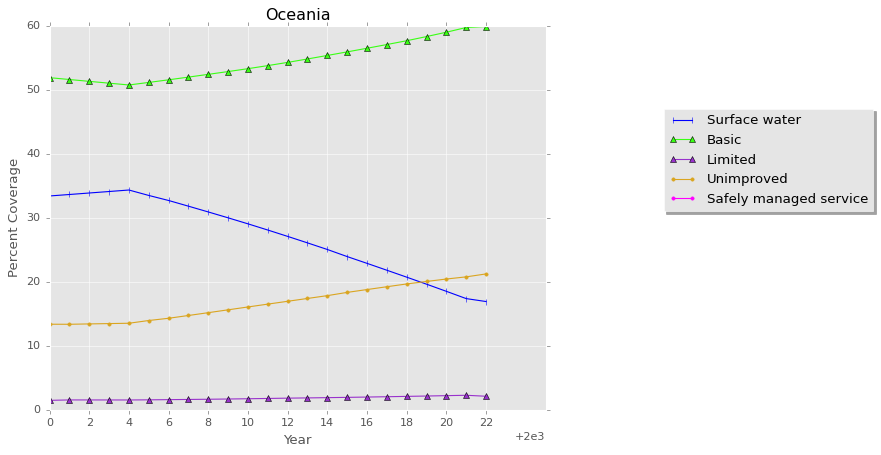

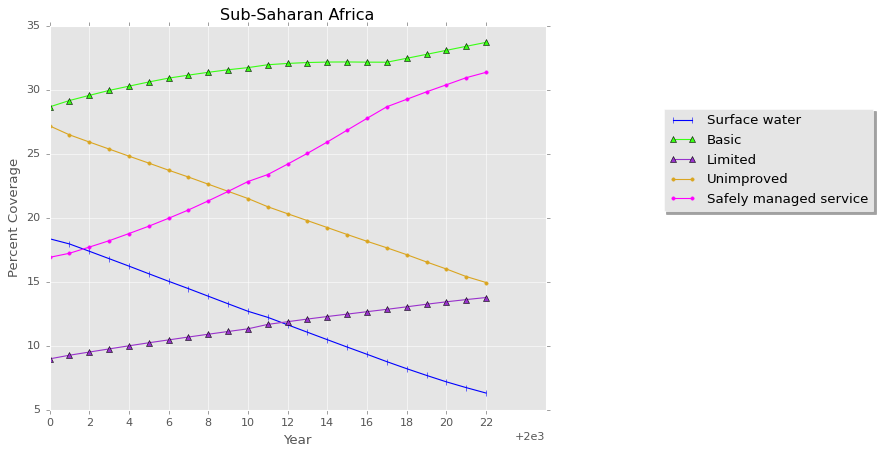

In [249]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
sdg_regions = [dw_Final_aus, dw_Final_csa, dw_Final_lac, dw_Final_nawa, dw_Final_oce, dw_Final_ssa]
sdg_region_title = ['Australia and New Zealand', 
                   'Central and Southern Asia',
                   'Latin America and the Caribbean', 
                   'Northern Africa and Western Asia', 
                   'Oceania', 
                   'Sub-Saharan Africa']
index = 0
for region in sdg_regions: 
        title = sdg_region_title[index]
        
        plt.plot(region['Year'], region['Surface water'], fillstyle = 'full', color = '#0000FF', marker = '|', label = "Surface water")
        plt.plot(region['Year'], region['Basic service'], fillstyle = 'full',color = '#39FF14', marker = '^', label = "Basic")
        plt.plot(region['Year'], region['Limited service'], fillstyle = 'full',color = '#9932CC', marker = '^', label = 'Limited')
        plt.plot(region['Year'], region['Unimproved'],fillstyle = 'full', color = '#DAA520', marker ='.', label = 'Unimproved')
        plt.plot(region['Year'], region['Safely managed service'], fillstyle = 'full',color = '#FF00FF', marker = '.', label = "Safely managed service")
        
        plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
        plt.xticks(range(2000,2023,2))
        plt.xlabel('Year')
        plt.ylabel('Percent Coverage')
        plt.title(title)
        plt.show()
        
        image_title =  'Plot of Water Service Levels Across the world'
        
        index += 1

In [250]:
import numpy as np

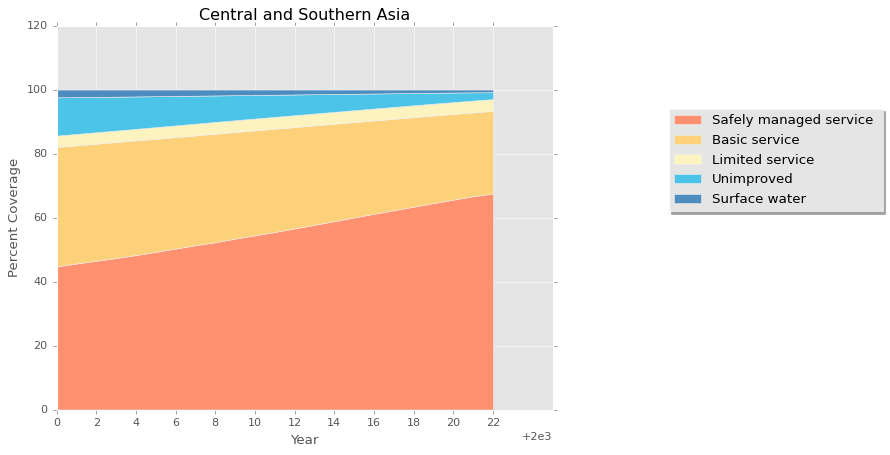

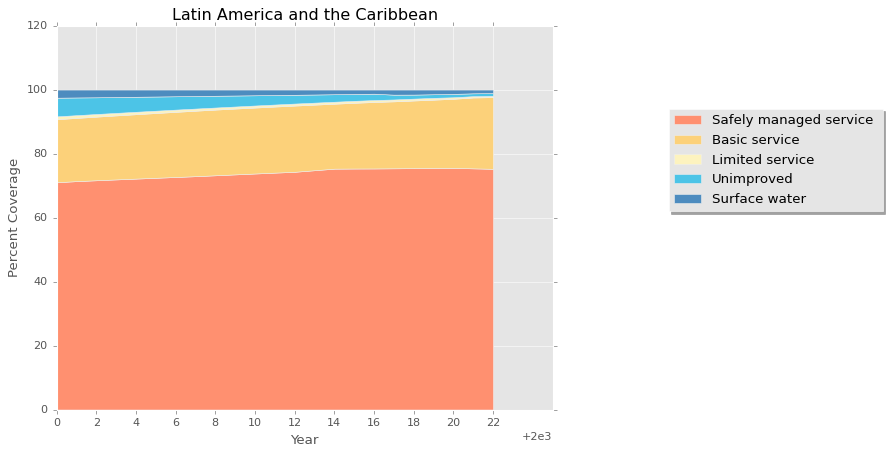

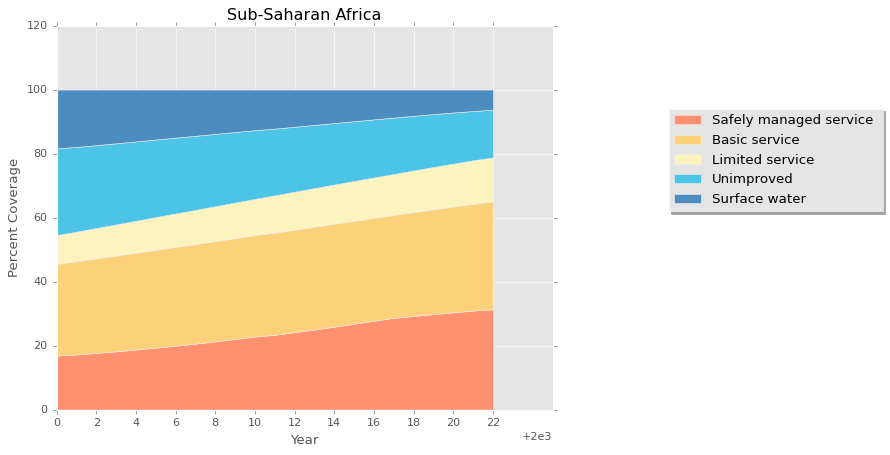

In [251]:
from matplotlib import pyplot
sdg_regions = [dw_Final_csa, dw_Final_lac, dw_Final_ssa]
sdg_region_title = ['Central and Southern Asia',
                   'Latin America and the Caribbean',
                   'Sub-Saharan Africa']
index = 0
for region in sdg_regions: 
    title = sdg_region_title[index]
    x = region['Year']
    y1 = region['Safely managed service']
    y2 = region['Basic service']
    y3 = region['Limited service']
    y4 = region['Unimproved']
    y5 = region['Surface water']

    y = np.vstack([y1,y2,y3,y4,y5])

    labels = ["Safely managed service ", "Basic service", "Limited service", "Unimproved", 
        "Surface water"]    
    colors=['#FF9070','#FCD17A','#FDF3BF', '#4CC4E7','#4D8CBF']
    fig, ax = plt.subplots()
    ax.stackplot(x,y1,y2,y3,y4,y5, labels=labels, colors=colors)
    plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
    plt.xticks(range(2000,2023,2))
    plt.xlabel('Year')
    plt.ylabel('Percent Coverage')
    plt.title(title)
    plt.show()
    index += 1

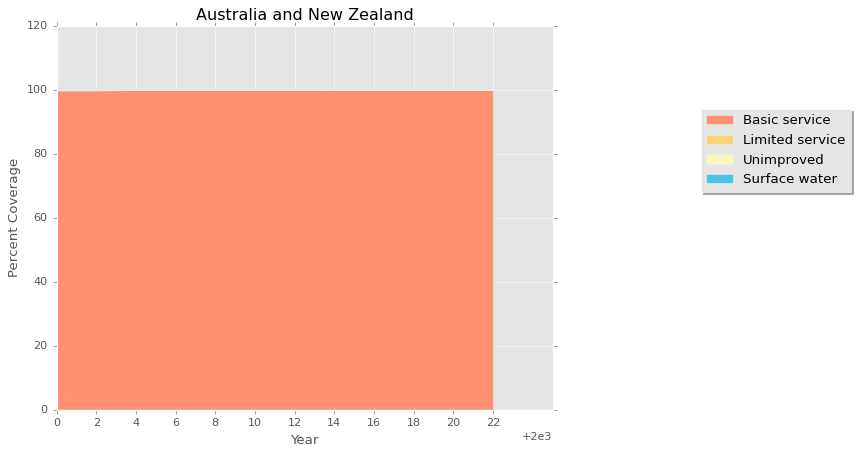

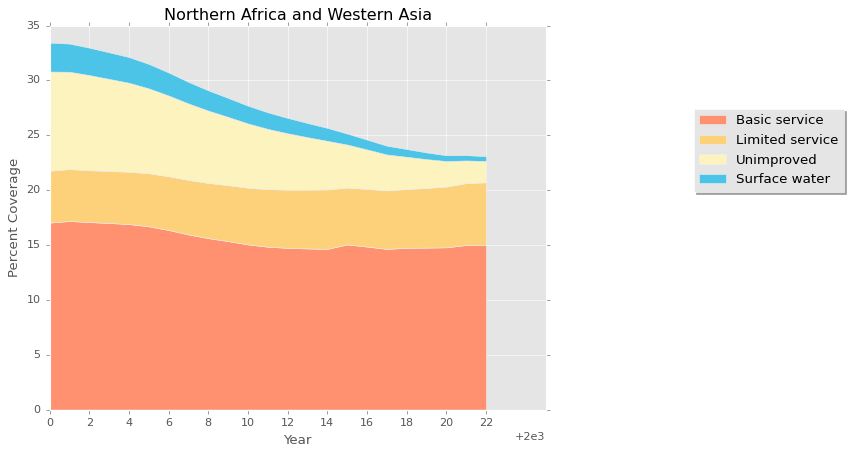

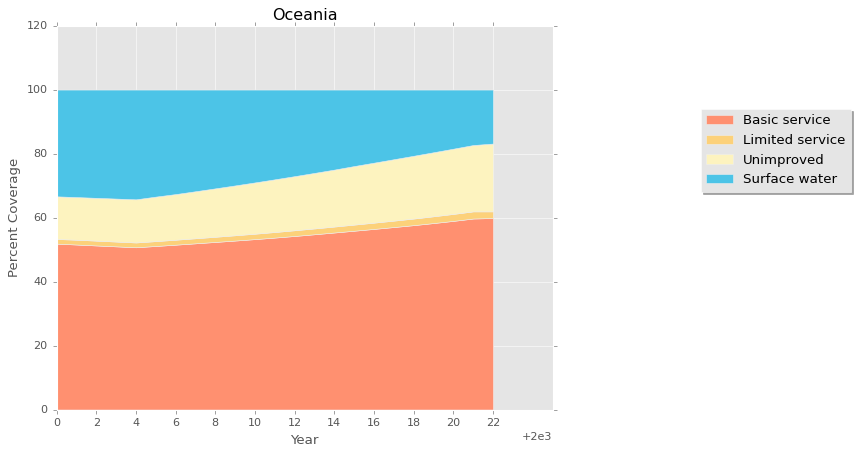

In [252]:
from matplotlib import pyplot
sdg_regions = [dw_Final_aus,dw_Final_nawa, dw_Final_oce]
sdg_region_title = ['Australia and New Zealand', 
                   'Northern Africa and Western Asia', 
                   'Oceania']
index = 0
for region in sdg_regions: 
    title = sdg_region_title[index]
    x = region['Year']
    y2 = region['Basic service']
    y3 = region['Limited service']
    y4 = region['Unimproved']
    y5 = region['Surface water']
    colors=['#FF9070','#FCD17A','#FDF3BF', '#4CC4E7','#4D8CBF']
        
    y = np.vstack([y2,y3,y4,y5])

    labels = ["Basic service", "Limited service", "Unimproved", "Surface water"]
    fig, ax = plt.subplots()
    ax.stackplot(x,y2,y3,y4,y5, labels=labels, colors=colors)
    plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
    plt.xticks(range(2000,2023,2))
    plt.xlabel('Year')
    plt.ylabel('Percent Coverage')
    plt.title(title)
    plt.show()
    index += 1

### 4.2) Mean and Medians of different water services by "Year"

Text(0.5, 0, 'Year')

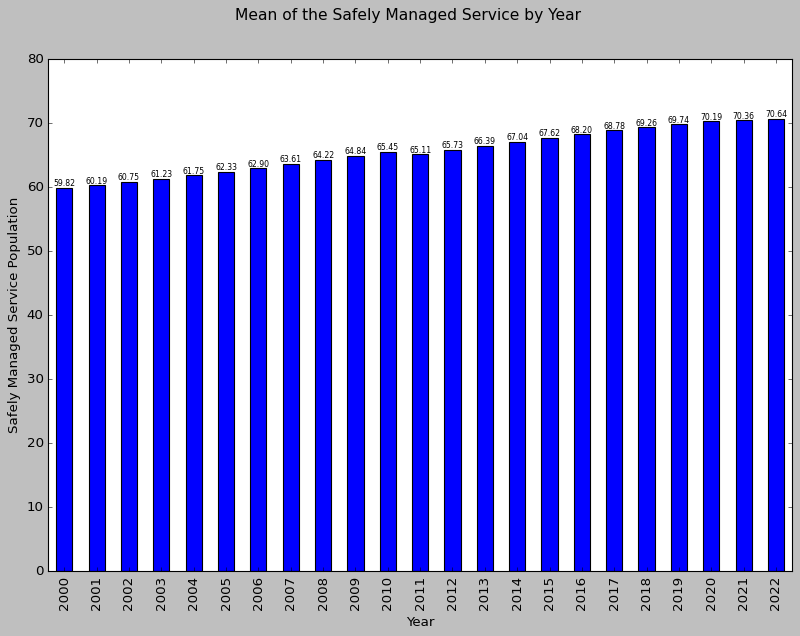

In [253]:
plt.style.use('classic')
mean_safely_managed = dw_Final.groupby('Year')['Safely managed service'].mean()
dw_Final.groupby('Year')['Safely managed service'].mean().plot(kind='bar', figsize=(12, 8))
for i, value in enumerate(mean_safely_managed):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom',fontsize=7)
plt.suptitle('Mean of the Safely Managed Service by Year', fontsize=14)
plt.ylabel('Safely Managed Service Population')
plt.xlabel('Year')

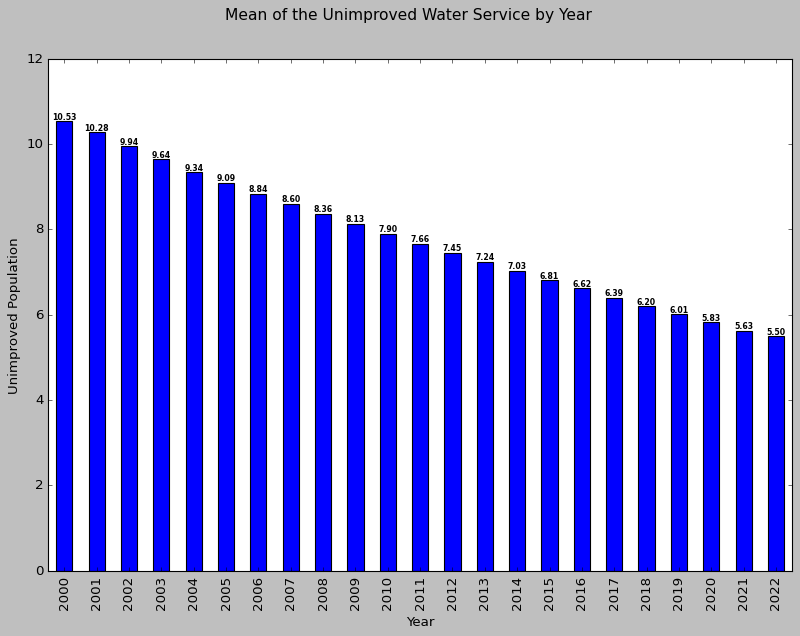

In [254]:
mean_unimproved = dw_Final.groupby('Year')['Unimproved'].mean()
for i, value in enumerate(mean_unimproved):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom',fontsize=7,fontweight='bold')
dw_Final.groupby('Year')['Unimproved'].mean().plot(kind='bar', figsize=(12, 8))
plt.suptitle('Mean of the Unimproved Water Service by Year', fontsize=14)
plt.ylabel('Unimproved Population')
plt.xlabel('Year')
plt.show()

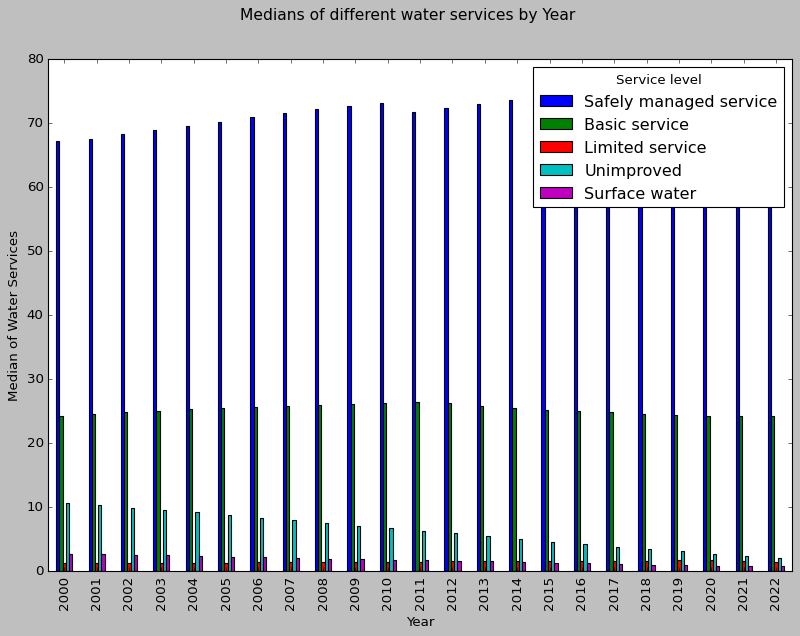

In [255]:
dw_Final.groupby('Year')[['Safely managed service', 'Basic service', 'Limited service','Unimproved', 'Surface water']].median().plot(kind='bar', figsize=(12, 8))
plt.suptitle('Medians of different water services by Year', fontsize=14)
plt.ylabel('Median of Water Services')
plt.xlabel('Year')
plt.show()

In [256]:
dw_Final.columns=['Region','Year','Basic Water','Limited Water','Safely Managed Water','Surface water','Unimproved water'] 

### 4.3) Data Cleaning and Analysis on Sanitation and Hygiene practices
- Transforming Hygiene and Sanitation data to merge them to Drinking Water and look at the trends 

In [257]:
import pandas as pd
hygiene = pd.read_csv("Hygiene_by_Regions(2000-2022).csv")
sanitation=pd.read_csv("Sanitation_by_Regions(2000-2022).csv")

In [258]:
hygiene.columns

Index(['Unnamed: 0', 'Region', 'Year', 'Basic Hygiene', 'Limited Hygiene',
       'No handwashing facility'],
      dtype='object')

In [259]:
hygiene = hygiene[[#'Unnamed: 0', 
    'Region', 'Year', 'Basic Hygiene', 'Limited Hygiene',
       'No handwashing facility']].copy()
hygiene.head()

,Region,Year,Basic Hygiene,Limited Hygiene,No handwashing facility
0,Central and Southern Asia,2010,178.89795,107.61639,13.48567
1,Central and Southern Asia,2011,180.64756,106.15612,13.19632
2,Central and Southern Asia,2012,182.54004,104.81504,12.64492
3,Central and Southern Asia,2013,184.46369,103.26237,12.27392
4,Central and Southern Asia,2014,186.36567,101.92441,11.70989


In [260]:
sanitation.columns

Index(['Unnamed: 0', 'Region', 'Year', 'Basic Sanitation',
       'Limited Sanitation', 'Open Defecation', 'Safely Managed Sanitation',
       'Unimproved Sanitation'],
      dtype='object')

In [261]:
sanitation = sanitation[[#'Unnamed: 0', 
    'Region', 'Year', 'Basic Sanitation',
       'Limited Sanitation', 'Open Defecation', 'Safely Managed Sanitation',
       'Unimproved Sanitation']].copy()
sanitation.head()

,Region,Year,Basic Sanitation,Limited Sanitation,Open Defecation,Safely Managed Sanitation,Unimproved Sanitation
0,Australia and New Zealand,2000,6.42874,0.0,0.0,93.56357,0.00769
1,Australia and New Zealand,2001,6.32666,0.0,0.0,93.66607,0.00728
2,Australia and New Zealand,2002,6.22457,0.0,0.0,93.76857,0.00686
3,Australia and New Zealand,2003,6.12248,0.0,0.0,93.87108,0.00644
4,Australia and New Zealand,2004,6.02040,0.0,0.0,93.97358,0.00602


### Merging sanitation and water data on Year and Region columns

In [262]:
newdf=pd.merge(sanitation, dw_Final, how='left', left_on=['Year','Region'], right_on = ['Year', 'Region'])

In [263]:
masterdf=pd.merge(newdf, hygiene, how='left', left_on=['Year', 'Region'],right_on=['Year', 'Region'])

In [264]:
masterdf.head()

,Region,Year,Basic Sanitation,Limited Sanitation,Open Defecation,Safely Managed Sanitation,Unimproved Sanitation,Basic Water,Limited Water,Safely Managed Water,Surface water,Unimproved water,Basic Hygiene,Limited Hygiene,No handwashing facility
0,Australia and New Zealand,2000,6.42874,0.0,0.0,93.56357,0.00769,99.76079,0.0,NaN,0.03932,0.19989,NaN,NaN,NaN
1,Australia and New Zealand,2001,6.32666,0.0,0.0,93.66607,0.00728,99.75979,0.0,NaN,0.03968,0.20053,NaN,NaN,NaN
2,Australia and New Zealand,2002,6.22457,0.0,0.0,93.76857,0.00686,99.76071,0.0,NaN,0.03936,0.19994,NaN,NaN,NaN
3,Australia and New Zealand,2003,6.12248,0.0,0.0,93.87108,0.00644,99.77938,0.0,NaN,0.03901,0.18161,NaN,NaN,NaN
4,Australia and New Zealand,2004,6.02040,0.0,0.0,93.97358,0.00602,99.79777,0.0,NaN,0.03869,0.16355,NaN,NaN,NaN


In [265]:
masterdf.shape

(184, 15)

In [266]:
masterdf.isnull().sum()

Region                         0
Year                           0
Basic Sanitation               0
Limited Sanitation             0
Open Defecation                0
Safely Managed Sanitation      0
Unimproved Sanitation          0
Basic Water                    0
Limited Water                  0
Safely Managed Water          46
Surface water                  0
Unimproved water               0
Basic Hygiene                118
Limited Hygiene              122
No handwashing facility      103
dtype: int64

### Handling Missing values

In [267]:
masterdf['Safely Managed Water'].fillna(0)
masterdf['Basic Hygiene'].fillna(0)
masterdf['Limited Hygiene'].fillna(0)
masterdf['No handwashing facility'].fillna(0)
masterdf.isnull().sum()

Region                         0
Year                           0
Basic Sanitation               0
Limited Sanitation             0
Open Defecation                0
Safely Managed Sanitation      0
Unimproved Sanitation          0
Basic Water                    0
Limited Water                  0
Safely Managed Water          46
Surface water                  0
Unimproved water               0
Basic Hygiene                118
Limited Hygiene              122
No handwashing facility      103
dtype: int64

In [268]:
masterdf.sample(5)

,Region,Year,Basic Sanitation,Limited Sanitation,Open Defecation,Safely Managed Sanitation,Unimproved Sanitation,Basic Water,Limited Water,Safely Managed Water,Surface water,Unimproved water,Basic Hygiene,Limited Hygiene,No handwashing facility
16,Australia and New Zealand,2016,4.79538,0.00000,0.00000,95.20355,0.00107,99.97482,0.00000,NaN,0.00000,0.02518,NaN,NaN,NaN
93,Latin America and the Caribbean,2001,95.90218,14.45326,40.22690,62.95101,36.08405,19.75033,0.86230,71.37896,2.47128,5.53712,NaN,NaN,NaN
44,Central and Southern Asia,2021,80.90621,35.57699,28.74743,145.65910,9.11028,26.17805,3.70627,66.67643,0.87123,2.56802,226.76649,62.68975,10.54377
54,Eastern and South-Eastern Asia,2008,107.61502,15.15380,14.21905,111.83549,51.17665,13.42152,1.03042,73.85641,2.19803,9.49362,NaN,NaN,15.18874
135,Northern Africa and Western Asia,2020,82.44524,9.50724,7.75824,177.48969,22.79960,14.78617,5.53644,76.82320,0.52675,2.32745,158.88217,22.13427,2.70490


In [269]:
masterdf['Region'].unique()

array(['Australia and New Zealand', 'Central and Southern Asia',
       'Eastern and South-Eastern Asia', 'Europe and Northern America',
       'Latin America and the Caribbean',
       'Northern Africa and Western Asia', 'Oceania',
       'Sub-Saharan Africa'], dtype=object)

In [270]:
masterdf.columns

Index(['Region', 'Year', 'Basic Sanitation', 'Limited Sanitation',
       'Open Defecation', 'Safely Managed Sanitation', 'Unimproved Sanitation',
       'Basic Water', 'Limited Water', 'Safely Managed Water', 'Surface water',
       'Unimproved water', 'Basic Hygiene', 'Limited Hygiene',
       'No handwashing facility'],
      dtype='object')

### 4.4) Data Visualization on Basic
- Following plot demonstrates the Median Percentage Coverages for
  1. "Basic Hygiene",
  2. "Basic Water Service" and
  3. "Basic Sanitation"
#around the world in given years. We are aiming to find trends that are present

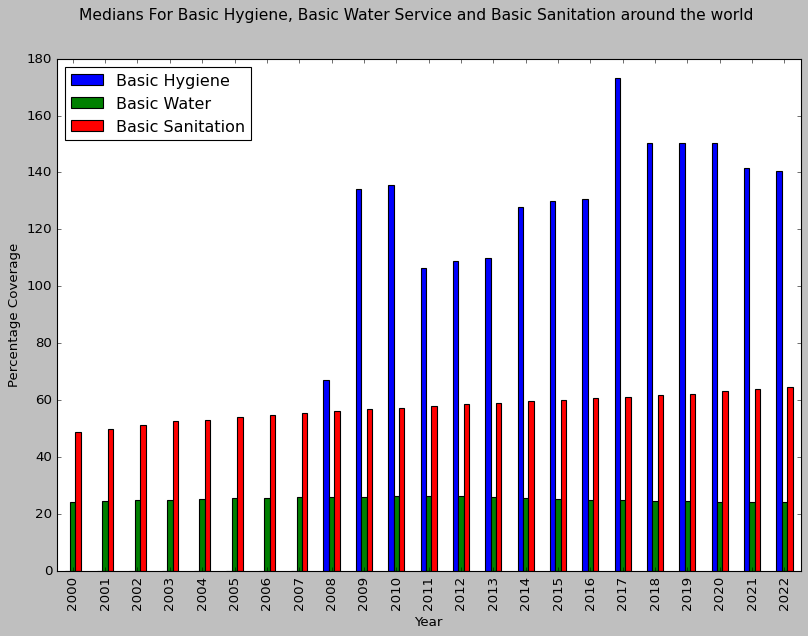

In [271]:
plt.style.use('classic')
masterdf.groupby('Year')[['Basic Hygiene', 'Basic Water','Basic Sanitation']].median().plot(kind='bar', figsize=(12, 8))
plt.suptitle('Medians For Basic Hygiene, Basic Water Service and Basic Sanitation around the world', fontsize=14)
plt.ylabel('Percentage Coverage')
plt.xlabel('Year')
plt.show()

## 4.5) Data Visualization on Unimproved 
- Following plot demonstrates the Median Percentage Coverages for
  1. "Unimproved Sanitation",
  2. "Unimproved Water" and
  3. "No Handwashing Facility"
#around the world in given years.We are aiming to find trends that are present.

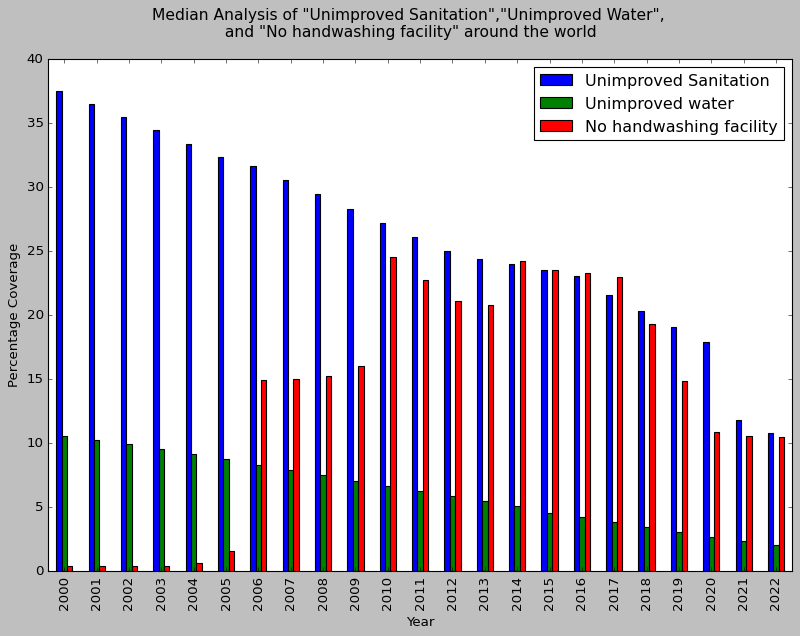

In [272]:
masterdf.groupby('Year')[['Unimproved Sanitation','Unimproved water', 'No handwashing facility']].median().plot(kind='bar', figsize=(12, 8))
plt.suptitle('Median Analysis of "Unimproved Sanitation","Unimproved Water",\n and "No handwashing facility" around the world', fontsize=14)
plt.ylabel('Percentage Coverage')
plt.xlabel('Year')
plt.show()

### 4.6) Data Visualization on Limited
- Following plot demonstrates the Median Percentage Coverages for
  1. "Limited Hygiene",
  2. "Limited Water Service" and
  3. "Limited Sanitation"
#around the world in given years. We are aiming to find trends that are present.

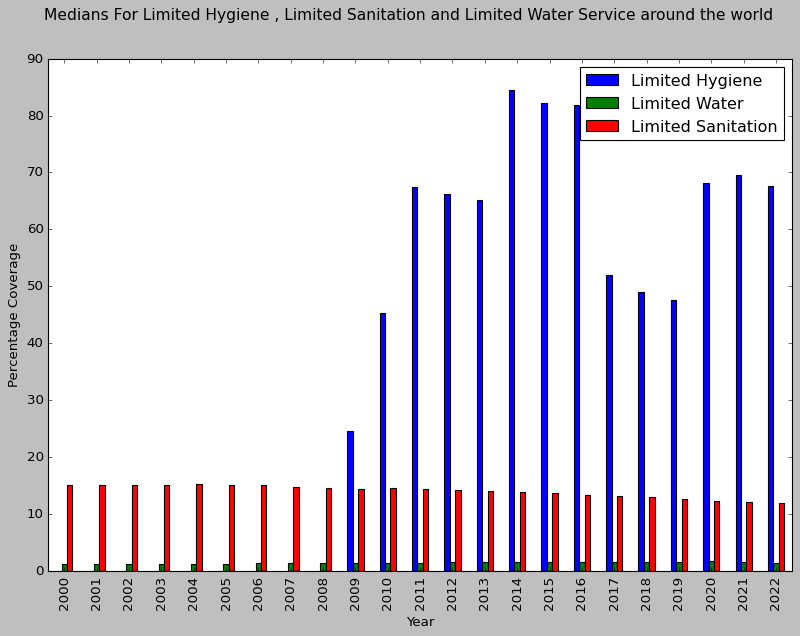

In [273]:
masterdf.groupby('Year')[['Limited Hygiene', 'Limited Water','Limited Sanitation']].median().plot(kind='bar', figsize=(12, 8))
plt.suptitle('Medians For Limited Hygiene , Limited Sanitation and Limited Water Service around the world', fontsize=14)
plt.ylabel('Percentage Coverage')
plt.xlabel('Year')
plt.show()

### 4.7) Data Visualization of "Basic Water", "Basic Sanitation" and "Basic Hygiene" services around different REGIONS 

In [274]:
masterdf_aus = masterdf[masterdf['Region'] == 'Australia and New Zealand']
masterdf_csa = masterdf[masterdf['Region'] == 'Central and Southern Asia']
masterdf_lac = masterdf[masterdf['Region'] == 'Latin America and the Caribbean']
masterdf_nawa = masterdf[masterdf['Region'] == 'Northern Africa and Western Asia']
masterdf_oce = masterdf[masterdf['Region'] == 'Oceania']
masterdf_ssa = masterdf[masterdf['Region'] == 'Sub-Saharan Africa']

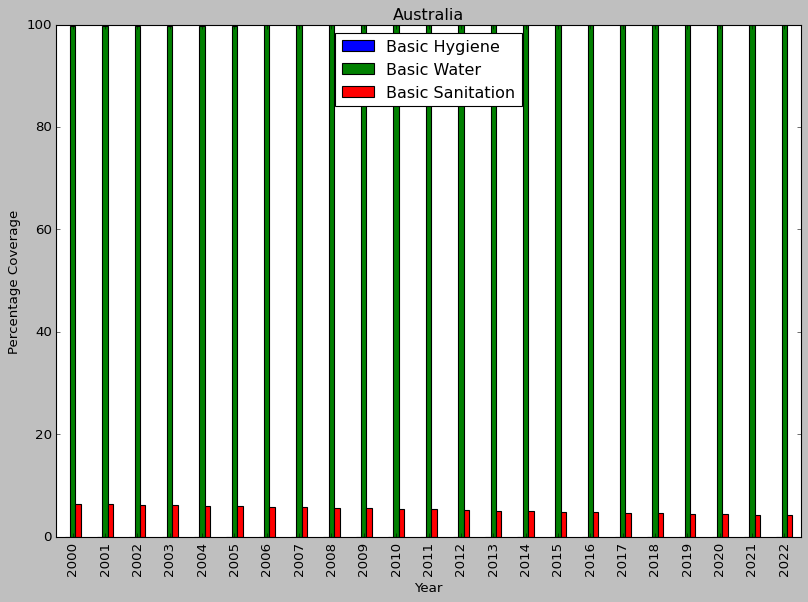

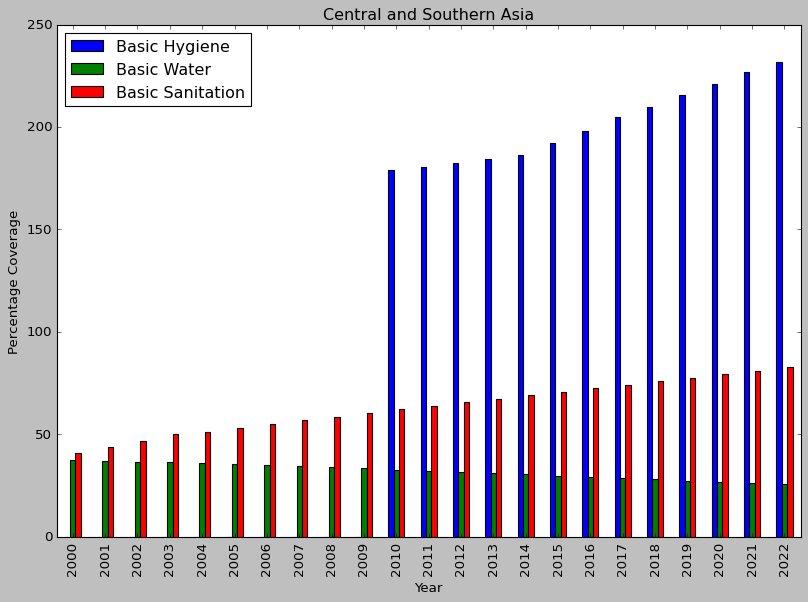

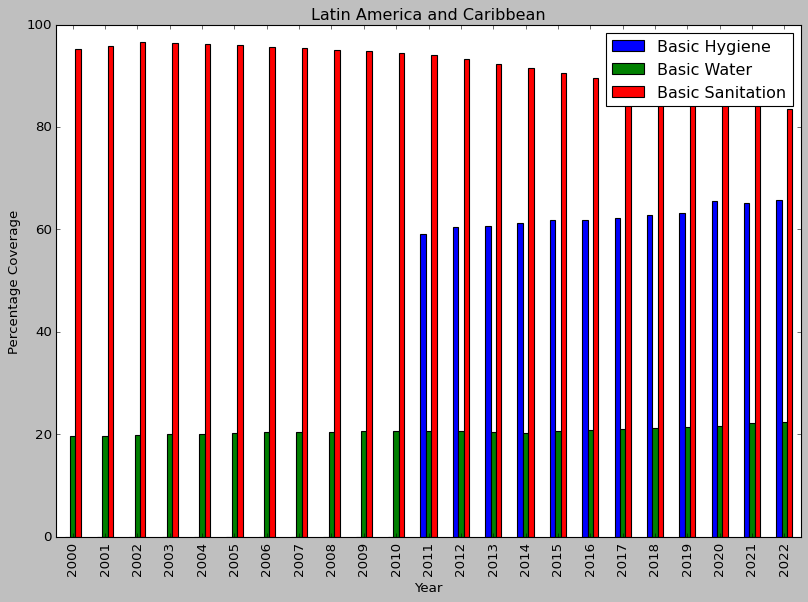

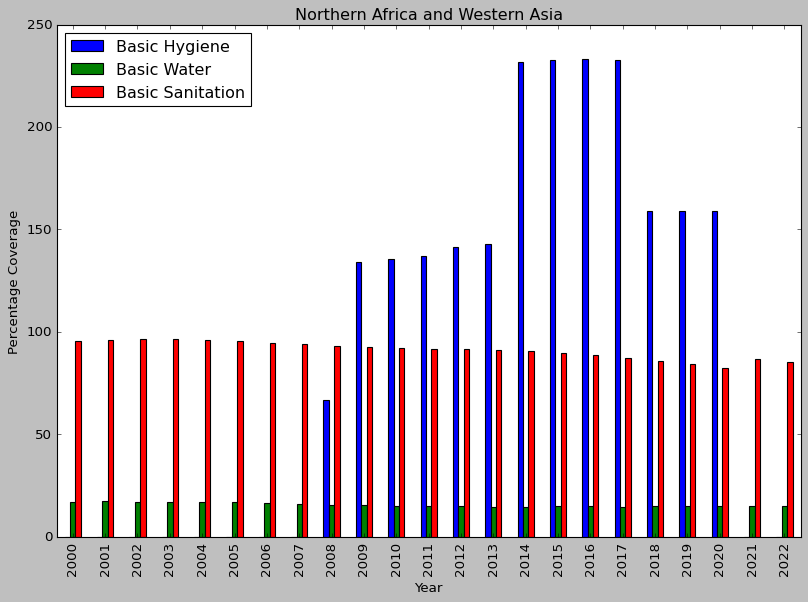

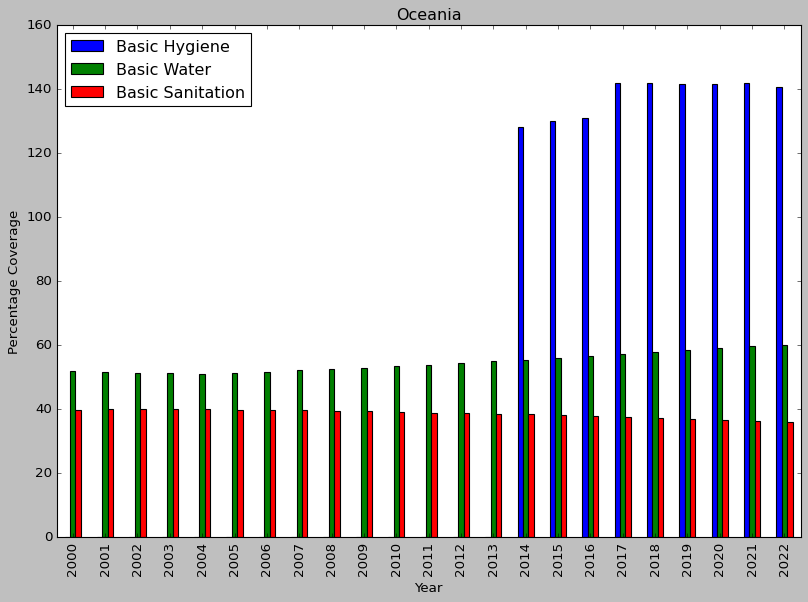

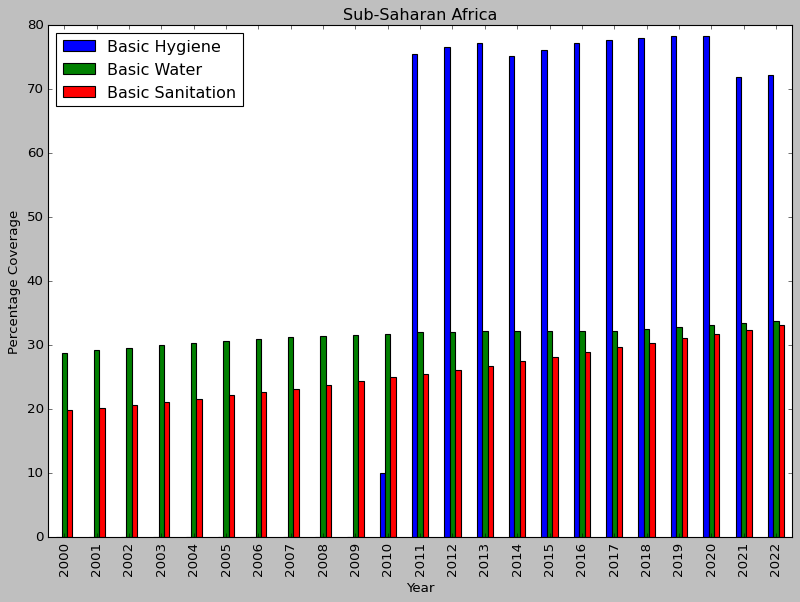

In [275]:
from matplotlib import pyplot
sdg_regions = [masterdf_aus, masterdf_csa, masterdf_lac,masterdf_nawa,masterdf_oce,masterdf_ssa]
sdg_region_title = ['Australia',
                   'Central and Southern Asia','Latin America and Caribbean','Northern Africa and Western Asia','Oceania',
                   'Sub-Saharan Africa']
index = 0
for region in sdg_regions: 
    title = sdg_region_title[index]
    region.groupby('Year')[['Basic Hygiene', 'Basic Water','Basic Sanitation']].max().plot(kind='bar', figsize=(12, 8))
    plt.ylabel('Percentage Coverage')
    plt.title(title)
    plt.xlabel('Year')
    index += 1

### 4.8) Histograms
- **Histograms** are commonly used for data visualization because they provide a clear representation of the distribution of continuous data.
- By grouping data into intervals (bins) and showing the frequency or percentage of observations in each bin, histograms reveal patterns, identify outliers, and help us understand central tendencies. - They allow quick comparisons between different groups and provide essential insights for data analysis.

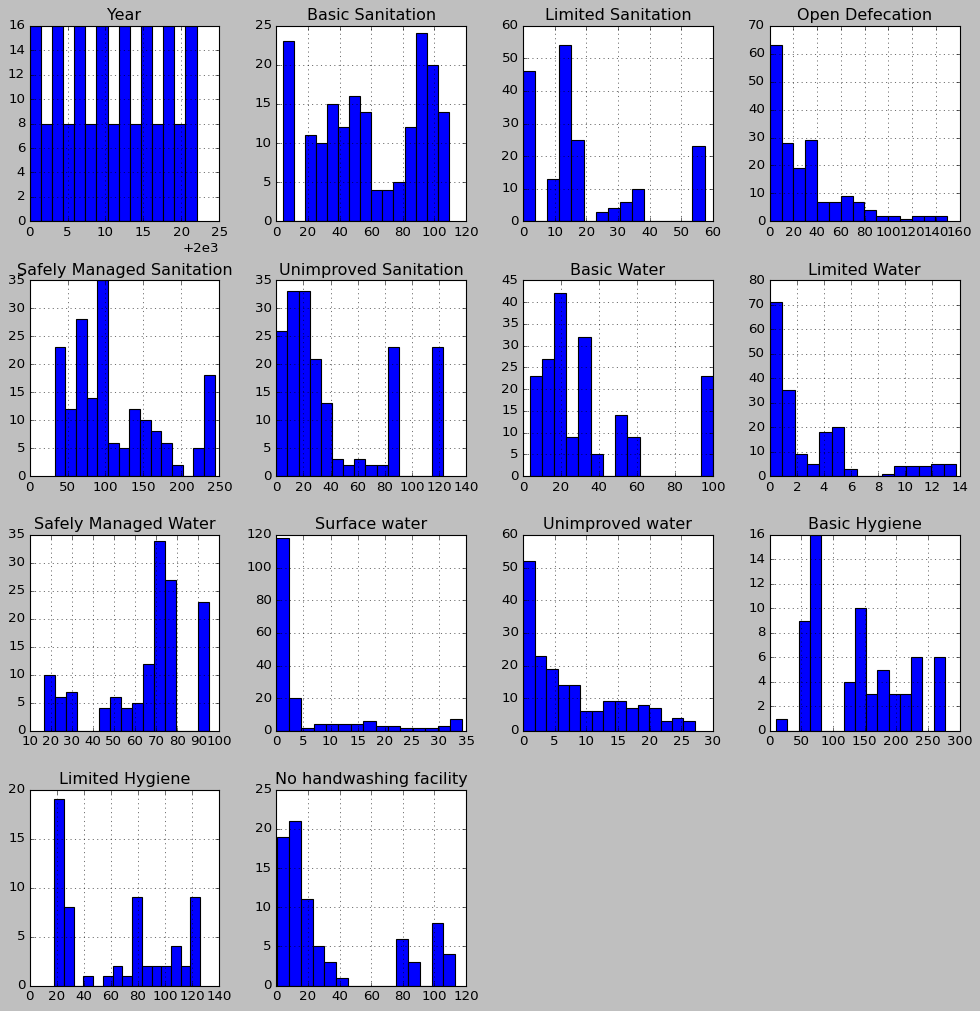

In [276]:
#Histogram of each category
plt.style.use('classic')
masterdf.hist(bins=15, figsize=(15,15))
plt.show()

### 4.9) Scatter Plots
- **Scatter plots** are widely used for data visualization because they effectively display the relationship between two continuous variables.
- Each data point is represented as a dot, and the position of these dots reveals patterns such as correlations, clusters, or outliers.
- Scatter plots allow quick visual assessment of data distribution and help identify trends, making them essential for exploratory analysis and understanding relationships in data.
- Scatterplots are useful for many reasons: like **correlation matrices**, it allows us to quickly understand a relationship between two categories

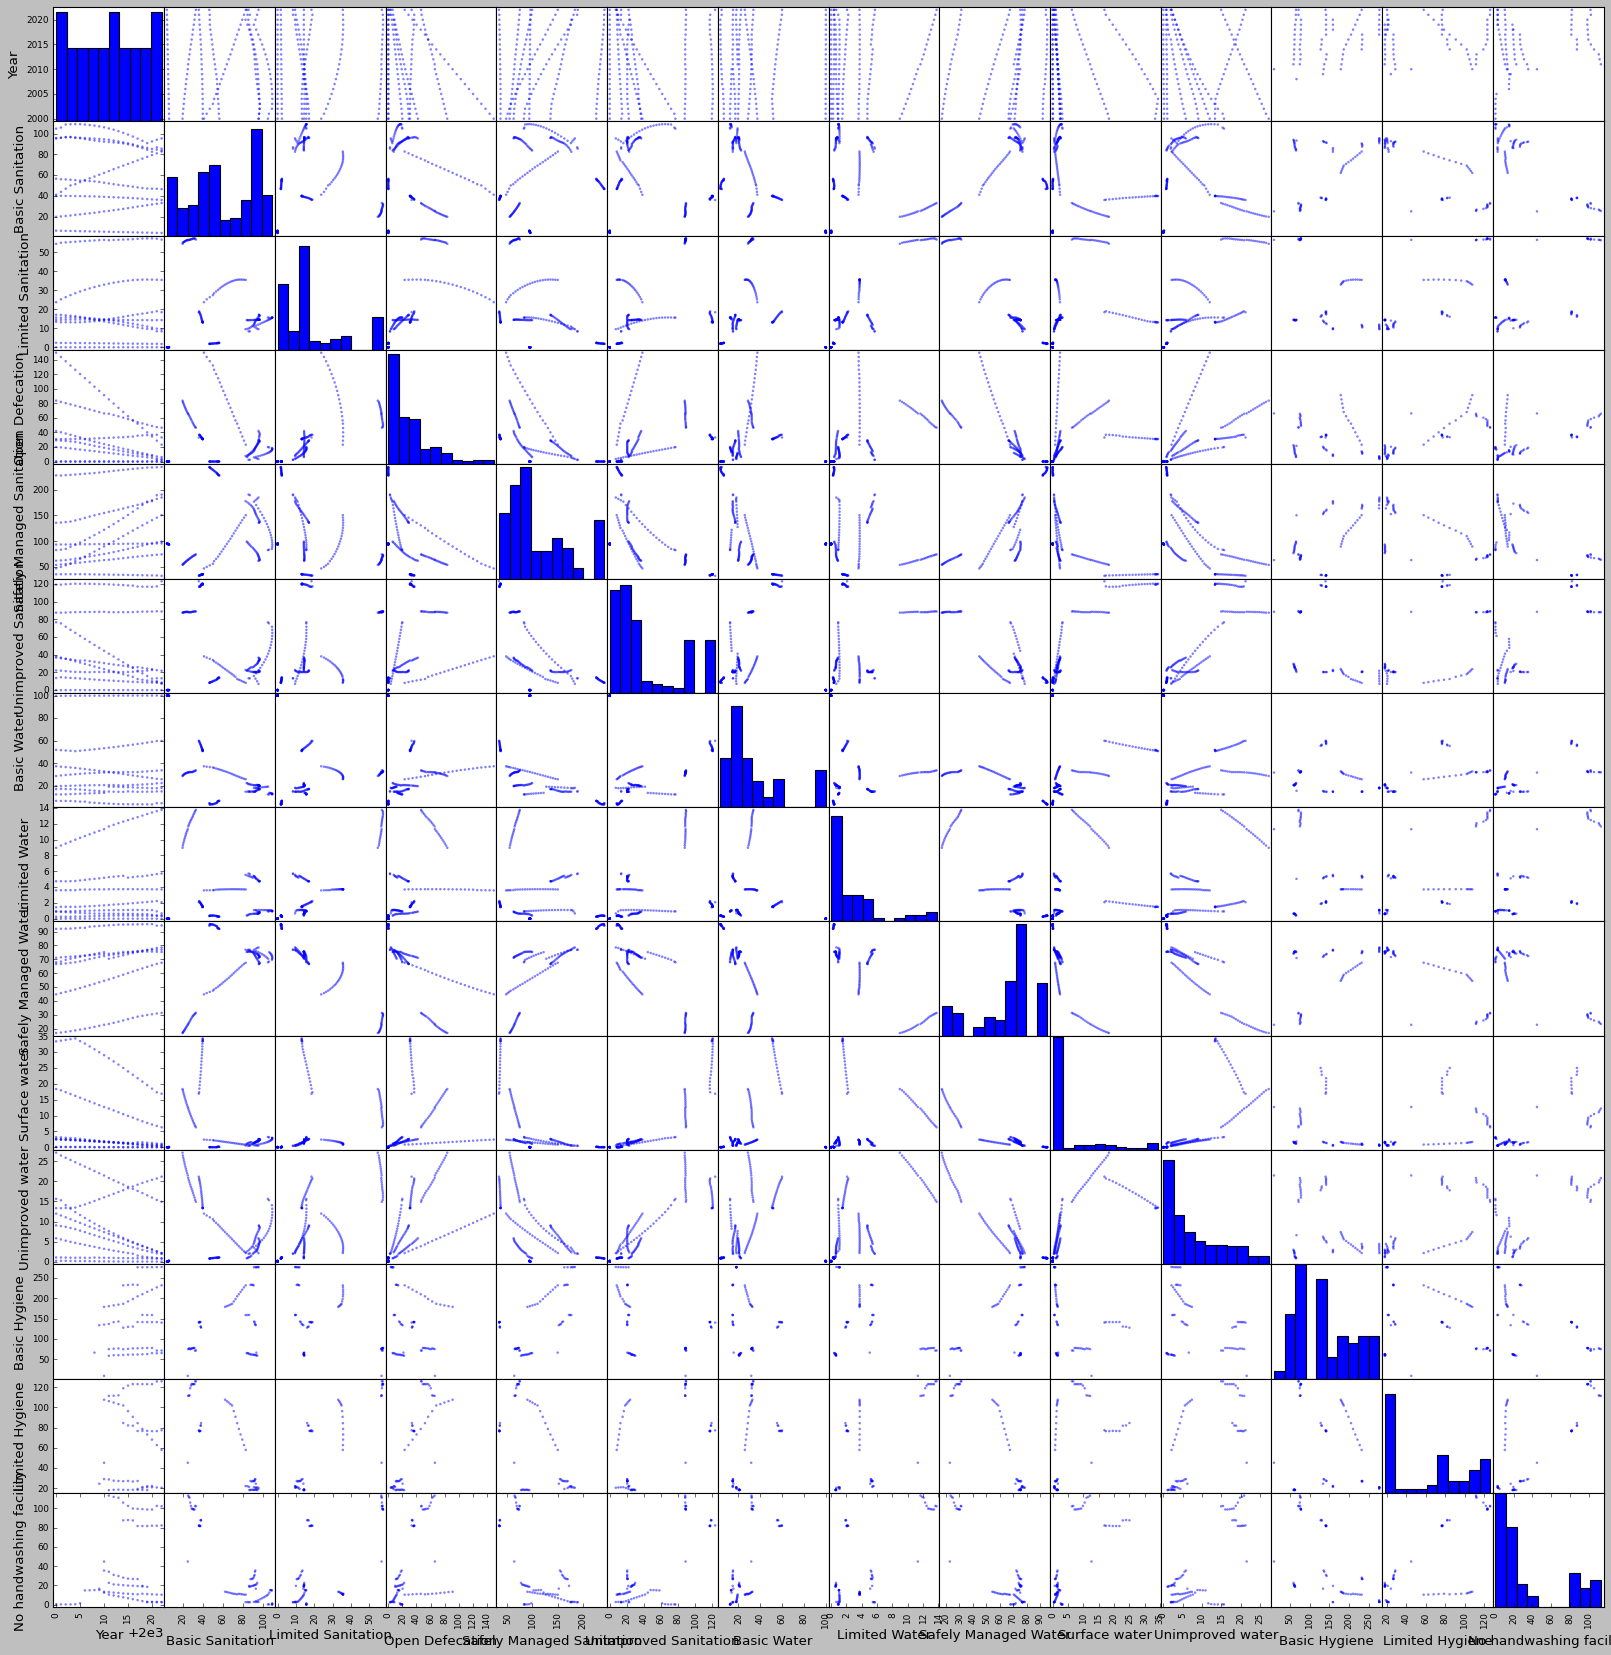

In [277]:
#Scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(masterdf, figsize=(25,25));
plt.show()

In [278]:
masterdf.columns

Index(['Region', 'Year', 'Basic Sanitation', 'Limited Sanitation',
       'Open Defecation', 'Safely Managed Sanitation', 'Unimproved Sanitation',
       'Basic Water', 'Limited Water', 'Safely Managed Water', 'Surface water',
       'Unimproved water', 'Basic Hygiene', 'Limited Hygiene',
       'No handwashing facility'],
      dtype='object')

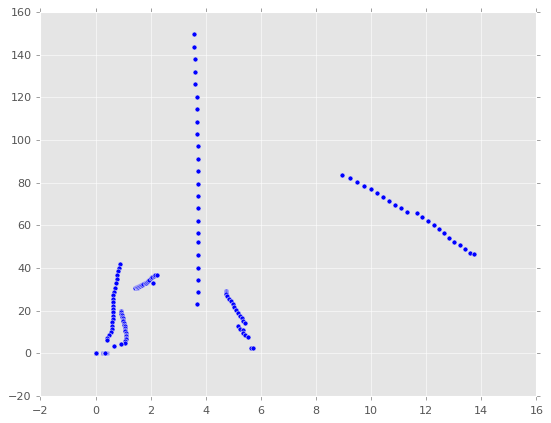

In [284]:
plt.scatter(x=masterdf['Limited Water'],y=masterdf['Open Defecation']) # Relation of x with y will be linear or not

### 4.10) Pairplot
- **Pair plots** provide a comprehensive view of feature interactions in a dataset.
- By displaying scatter plots for pairs of variables, they reveal relationships, clusters, and outliers.
- Pair plots inspire hypotheses and help us understand how features influence each other.
- sns.pairplot() is a great way to create scatterplots between all of our categories

In [280]:
masterdf.columns

Index(['Region', 'Year', 'Basic Sanitation', 'Limited Sanitation',
       'Open Defecation', 'Safely Managed Sanitation', 'Unimproved Sanitation',
       'Basic Water', 'Limited Water', 'Safely Managed Water', 'Surface water',
       'Unimproved water', 'Basic Hygiene', 'Limited Hygiene',
       'No handwashing facility'],
      dtype='object')

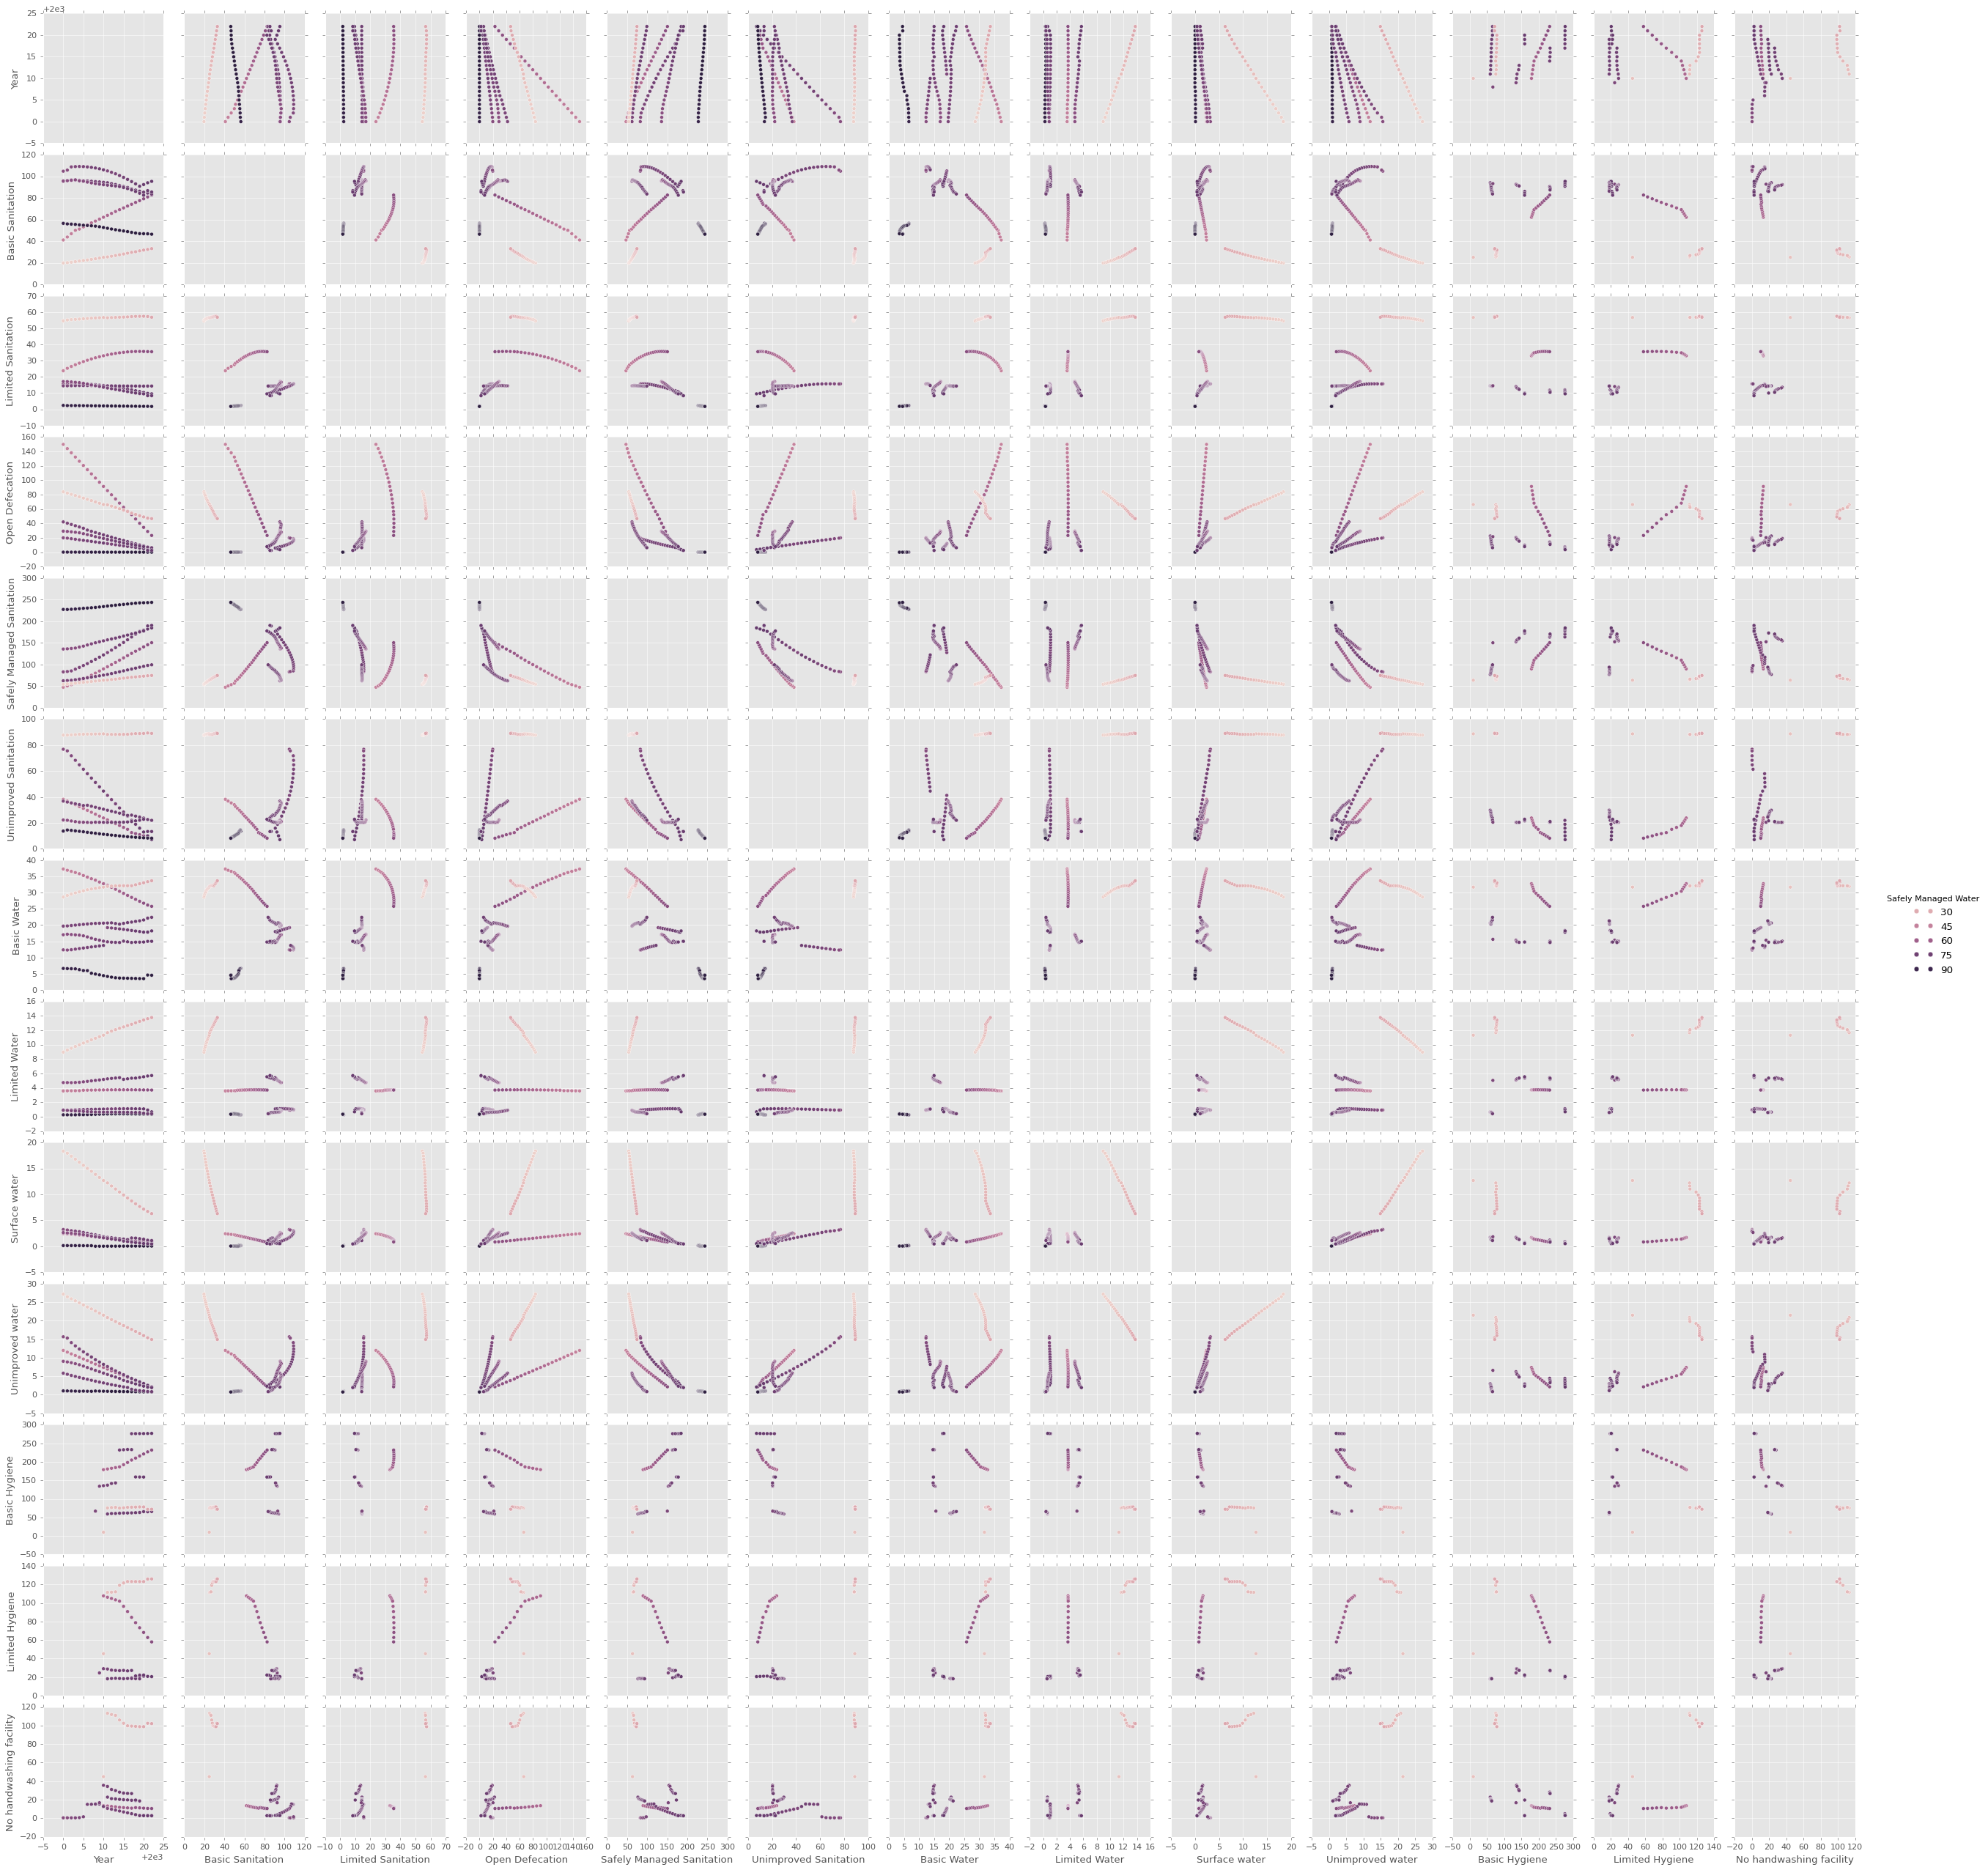

In [281]:
plt.style.use("ggplot")
sns.pairplot(data=masterdf,hue="Safely Managed Water")
plt.show()

### 5) Analyzing relationship between variables
**Correlation analysis**
- Correlation analysis in Data Analysis is a statistical technique used to measure the strength and direction of the relationship between two or more variables in a dataset.
- It helps data analysts to understand how changes in one variable are associated with changes in
another.
- By calculating correlation coefficients, such as Pearson’s correlation coefficient for continuous variables or rank-based correlations for non-linear or ordinal data, data scientists can identify patterns and dependencies in the data.
- This analysis is valuable for feature selection, identifying
potential predictor variables, and gaining insights into the interactions between different aspects
of the dataset, facilitating better decision-making and predictive modeling.

<Axes: >

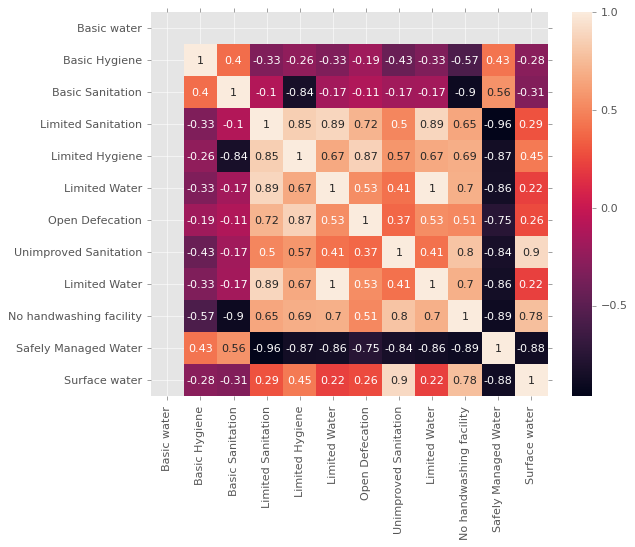

In [282]:
# Correlations provide evidence of association, not causation.
# Positive r values indicate positive association between the variables, and negative r values indicate negative associations.
from pandas import DataFrame
import seaborn as sns

df = DataFrame(masterdf,columns=['Basic water','Basic Hygiene','Basic Sanitation','Limited Sanitation',
                           'Limited Hygiene','Limited Water', 'Open Defecation','Unimproved Sanitation','Limited Water','No handwashing facility','Safely Managed Water','Surface water'])

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)

#### Deinitions of Terms used above 
1. **Basic Water**: According to UNICEF, basic water refers to access to an improved water source **within a *30-minute* walk from home**. This can include piped water, public taps, boreholes, protected wells, and rainwater collection systems.
2. **Basic Hygiene**: UNICEF defines basic hygiene as the availability of a handwashing facility with soap and water within the household or **within a *30-minute* walk from home**.
3. **Basic Sanitation**: According to the World Health Organization (WHO), basic sanitation refers to the use of improved sanitation facilities, such as flush toilets, pit latrines, and composting toilets, that are not shared with other households.
4. **Limited Sanitation**: The WHO defines limited sanitation as the use of sanitation facilities that are shared with other households, or the use of unimproved sanitation facilities, such as open pits or bucket toilets.
5. **Limited Hygiene**: UNICEF defines limited hygiene as the availability of a handwashing facility without soap, or the lack of a handwashing facility within the household or **within a *30-minute* walk from home**.
6. **Limited Water**: According to UNICEF, limited water refers to access to an improved water source that is **more than *30 minutes* away from home**, or the use of unimproved water sources, such as surface water or unprotected wells.
7. **Open Defecation**: The WHO defines open defecation as the practice of defecating in the open, without using a toilet or other sanitation facility.
8. **Unimproved Sanitation**: According to the WHO, unimproved sanitation refers to the use of sanitation facilities that do not meet the standards for improved sanitation, such as open pits, bucket toilets, or hanging toilets.
9. **No Handwashing Facility**: UNICEF defines no handwashing facility as the lack of a handwashing facility with soap and water within the household or **within a *30-minute* walk from home**.
10. **Safely Managed Water**: According to the WHO, safely managed water refers to access to an improved water source that is located on premises, is available when needed, and is free from contamination.
11. **Surface Water**: The WHO defines surface water as water that is collected from the surface of the earth, such as from rivers, lakes, or ponds, without any treatment or protection.

## Conclusions:
### Following are closely related
1. **Limited Water & Limited Sanitation**(0.89) : People with limited water access tends to practice shared sanitation facilities or use of unimproved sanitation facilities like open pits or bucket toilets.
2. **Limited Sanitation & Limited Hygiene**(0.85) : People with limited sanitation facilities are likely to follow less hygienic practices like handwashing without SOAP or within a 30-min walk from home.
3. **Limited Hygiene & Open defecation**(0.87) : means people who are less hygienic tends to defecate on open grounds, farms, etc (especially in rural areas and less developed regions), without using toilets for same.

4. **Surface Water & Unimproved Sanitation**(0.90) : People who collect unfiltered or not-well-treated water from surface sources like rivers, ponds, or lakes,etc are more tilted to practice unimproved sanitation facilities like open pits, hanging toilets,or bucket toilets on open grounds. 
5. **Unimproved Sanitation & No handwashing facility**(0.80) : People who are not equiped with good sanitation facilities, lacks the proper handwashing facility(like with soap) or water access 30-min walk from home.